FOOTBALL ANALYSIS


A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly 

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut


In [ ]:
data1 = pd.read_csv('fifa_ranking.csv')
data1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
data1.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
data2 = pd.read_csv('results.csv')
data2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
data2.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
data1.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
data2.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
data1.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
data2.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
data1.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
data2.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

##Data Cleaning

In [ ]:
# First, convert boolean type to string

booleandf = data2.select_dtypes(include=[bool])
booleanDictionary = {True: 'TRUE', False: 'FALSE'}

for column in booleandf:
    data2['neutral'] = data2['neutral'].map(booleanDictionary)

In [ ]:
# Drop records where neutral is true

data2 = data2.drop(data2[data2.neutral == 'TRUE'].index)

data2.neutral.value_counts()

FALSE    30680
Name: neutral, dtype: int64

In [ ]:
# Need to convert date column from object to date type
data1['rank_date'] = pd.to_datetime(data1['rank_date'])
data2['date'] = pd.to_datetime(data2['date'])

In [ ]:
# Combined month and year column

data1['month_year'] = pd.to_datetime(data1['rank_date']).dt.to_period('M')
data2['month_year'] = pd.to_datetime(data2['date']).dt.to_period('M')

In [ ]:
# Dropping unneccessary columns from the fifa ranking dataset

data1 = data1.drop(columns=['country_abrv', 'total_points', 'previous_points','rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'])

In [ ]:
# We can now use an inner join to merge the two datasets

# First we merge on the home team to get the home team ranks

home_team = pd.merge(data2, data1, left_on= ['home_team', 'month_year'], 
                     right_on= ['country_full', 'month_year'], how = 'inner')

# renaming the rank colum to home_team_rank

home_team.rename(columns={'rank' : 'home_team_rank'}, inplace=True)
home_team

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month_year,home_team_rank,country_full,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,70,Peru,CONMEBOL,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,70,Peru,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14043,2018-06-12,Poland,Lithuania,4,0,Friendly,Warsaw,Poland,FALSE,2018-06,8,Poland,UEFA,2018-06-07
14044,2018-06-09,Denmark,Mexico,2,0,Friendly,Brøndby,Denmark,FALSE,2018-06,12,Denmark,UEFA,2018-06-07
14045,2018-06-09,Hungary,Australia,1,2,Friendly,Budapest,Hungary,FALSE,2018-06,51,Hungary,UEFA,2018-06-07
14046,2018-06-09,Estonia,Morocco,1,3,Friendly,Tallinn,Estonia,FALSE,2018-06,94,Estonia,UEFA,2018-06-07


In [ ]:
# Next, we merge on the away team to get their ranks

away_team = pd.merge(data2, data1, left_on=['away_team', 'month_year'],
                     right_on= ['country_full', 'month_year'], how = 'inner')

away_team.rename(columns={'rank' : 'away_team_rank'}, inplace=True)
away_team

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month_year,away_team_rank,country_full,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,67,Paraguay,CONMEBOL,1993-08-08
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,FALSE,1993-08,67,Paraguay,CONMEBOL,1993-08-08
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,5,Argentina,CONMEBOL,1993-08-08
3,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,FALSE,1993-08,5,Argentina,CONMEBOL,1993-08-08
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,5,Argentina,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,2018-06-09,Estonia,Morocco,1,3,Friendly,Tallinn,Estonia,FALSE,2018-06,41,Morocco,CAF,2018-06-07
14036,2018-06-09,Finland,Belarus,2,0,Friendly,Tampere,Finland,FALSE,2018-06,78,Belarus,UEFA,2018-06-07
14037,2018-06-10,Austria,Brazil,0,3,Friendly,Vienna,Austria,FALSE,2018-06,2,Brazil,CONMEBOL,2018-06-07
14038,2018-06-12,Poland,Lithuania,4,0,Friendly,Warsaw,Poland,FALSE,2018-06,126,Lithuania,UEFA,2018-06-07


**The away_team and home_team dataframe have similar columns so we can get only the unique column from the away_team to merge with full home_team dataframe in order to produce the final dataframe

In [ ]:
# extract unique colums for away_team

final_away_team = away_team[['date','home_team', 'away_team', 'away_team_rank']]
final_away_team

,date,home_team,away_team,away_team_rank
0,1993-08-01,Colombia,Paraguay,67
1,1993-08-29,Argentina,Paraguay,67
2,1993-08-01,Peru,Argentina,5
3,1993-08-08,Paraguay,Argentina,5
4,1993-08-15,Colombia,Argentina,5
...,...,...,...,...
14035,2018-06-09,Estonia,Morocco,41
14036,2018-06-09,Finland,Belarus,78
14037,2018-06-10,Austria,Brazil,2
14038,2018-06-12,Poland,Lithuania,126


In [ ]:
# Merge home team dataframe and final away team dataframe

final = pd.merge(home_team, final_away_team, left_on = ['home_team', 'away_team', 'date'],
                 right_on = ['home_team', 'away_team', 'date'], how = 'inner')

final

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month_year,home_team_rank,country_full,confederation,rank_date,away_team_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08,67
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08,5
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08,70
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,70,Peru,CONMEBOL,1993-08-08,5
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,70,Peru,CONMEBOL,1993-08-08,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12945,2018-06-12,Poland,Lithuania,4,0,Friendly,Warsaw,Poland,FALSE,2018-06,8,Poland,UEFA,2018-06-07,126
12946,2018-06-09,Denmark,Mexico,2,0,Friendly,Brøndby,Denmark,FALSE,2018-06,12,Denmark,UEFA,2018-06-07,15
12947,2018-06-09,Hungary,Australia,1,2,Friendly,Budapest,Hungary,FALSE,2018-06,51,Hungary,UEFA,2018-06-07,36
12948,2018-06-09,Estonia,Morocco,1,3,Friendly,Tallinn,Estonia,FALSE,2018-06,94,Estonia,UEFA,2018-06-07,41


In [ ]:
# Drop unnecessary columns in the final dataframe

final = final.drop(columns=['country_full', 'confederation', 'rank_date', 'month_year', 'city',
                            'country'])
final

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,away_team_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,FALSE,19,67
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,FALSE,19,5
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,FALSE,19,70
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,FALSE,70,5
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,FALSE,70,19
...,...,...,...,...,...,...,...,...,...
12945,2018-06-12,Poland,Lithuania,4,0,Friendly,FALSE,8,126
12946,2018-06-09,Denmark,Mexico,2,0,Friendly,FALSE,12,15
12947,2018-06-09,Hungary,Australia,1,2,Friendly,FALSE,51,36
12948,2018-06-09,Estonia,Morocco,1,3,Friendly,FALSE,94,41


In [ ]:
# Checking for duplicate records

final.duplicated().any()

True

In [ ]:
# Drop duplicates 

final.drop_duplicates(keep = 'first', inplace=True)

In [ ]:
# Verify there are no more duplicates

final.duplicated().any()

False

##Exploratory Data Analysis

###Univariate Analysis

In [ ]:
# summary of standard deviation, range, and interquatile range

final.describe()

,home_score,away_score,home_team_rank,away_team_rank
count,12916.000000,12916.000000,12916.000000,12916.000000
mean,1.641375,0.998761,75.007433,77.558145
std,1.616620,1.164050,49.486915,51.147970
min,0.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,33.000000,35.000000
50%,1.000000,1.000000,70.000000,71.000000
75%,2.000000,2.000000,110.000000,114.000000
max,31.000000,13.000000,209.000000,209.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


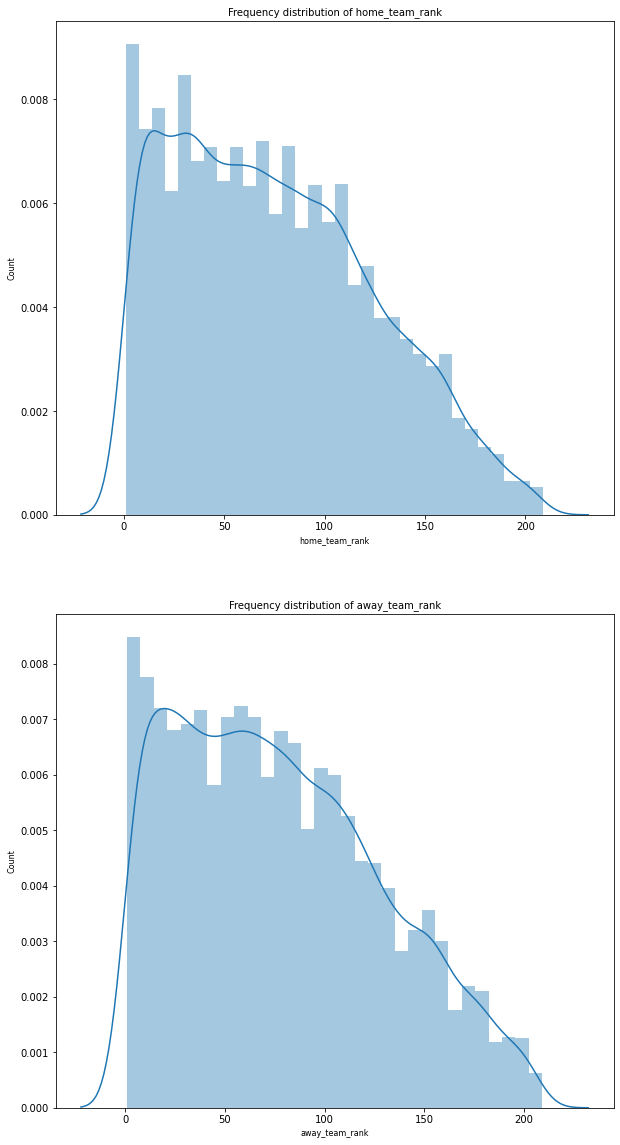

In [ ]:
# Frequency distribution plots

col_names = ['home_team_rank','away_team_rank']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(final[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

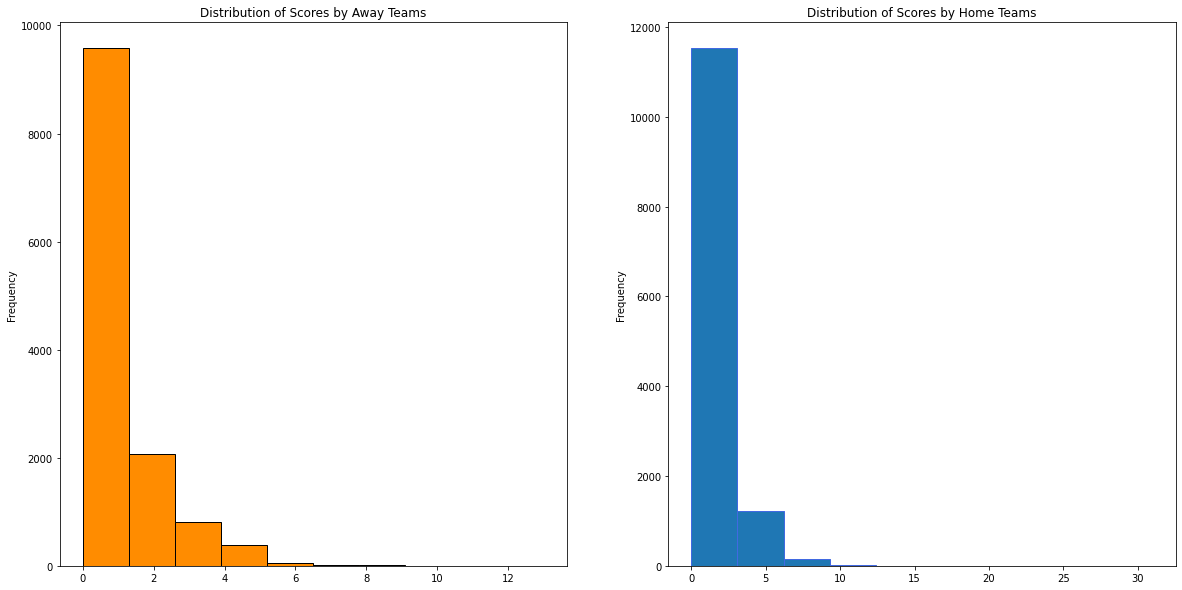

In [ ]:
# histograms to show distribution of goals scores

fig, ax=plt.subplots(1,2, figsize=(20,10))
final['away_score'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('Distribution of Scores by Away Teams')

final['home_score'].plot.hist(ax=ax[1], bins=10, edgecolor='royalblue')
ax[1].set_title('Distribution of Scores by Home Teams')


plt.show()

###Bivariate Analysis

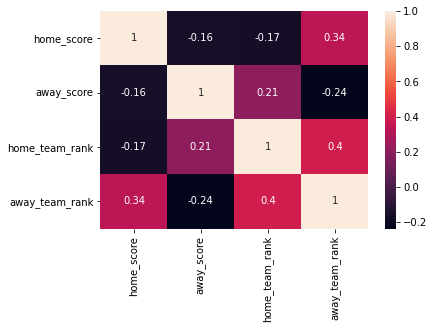

In [ ]:
# Checking the pearson correlation coefficient using a heatmap 

sns.heatmap(final.corr(),annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


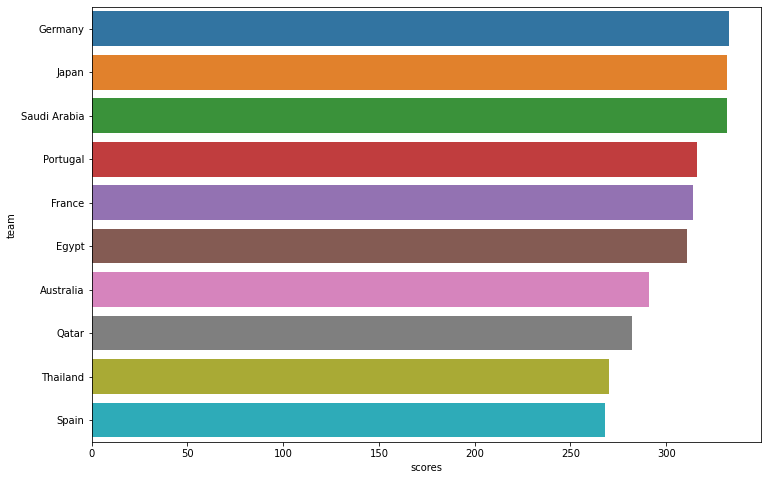

In [ ]:
# Bar chart showing the top 10 highest ranking home teams by total scores

total_home_score = final.groupby('home_team')['home_score'].sum().reset_index()
total_home_score.columns = ['team', 'scores'] 
total_home_goals = total_home_score.sort_values('scores', ascending=False)

plt.figure(figsize=(12,8))
ax= sns.barplot("scores","team",data=total_home_goals[:10])

##Implementing The Solution

Before we begin regression analysis, we first need to create an additional column showing whether a match was a win, loss or draw from the home team's perspective.

In [ ]:
# creating a list of our conditions

conditions = [final['home_score'] > final['away_score'],
              final['home_score'] < final['away_score'],
              final['home_score'] == final['away_score']]

# create a list of the values to assign each condition

values = ['Win', 'Loss', 'Draw']

# creating a new columnn status column using the conditions and values above

final['status'] = np.select(conditions, values)

final.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,away_team_rank,status
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,FALSE,19,67,Draw
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,FALSE,19,5,Win
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,FALSE,19,70,Win
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,FALSE,70,5,Loss
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,FALSE,70,19,Loss


##Polynomial Regression

In [ ]:
# Dropping all columns that are no longer needed for the polynomial regression analysis

poly_final = final.drop(columns=['date', 'neutral', 'home_team','away_team', 'status'])

poly_final.head()

,home_score,away_score,tournament,home_team_rank,away_team_rank
0,0,0,FIFA World Cup qualification,19,67
1,2,1,FIFA World Cup qualification,19,5
2,4,0,FIFA World Cup qualification,19,70
3,0,1,FIFA World Cup qualification,70,5
4,0,1,FIFA World Cup qualification,70,19


####Predicting home goals

In [ ]:

# encoding the tournament column with numeric codes

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()
poly_final['tournament'] = le.fit_transform(poly_final['tournament'])

poly_final.head()

,home_score,away_score,tournament,home_team_rank,away_team_rank
0,0,0,25,19,67
1,2,1,25,19,5
2,4,0,25,19,70
3,0,1,25,70,5
4,0,1,25,70,19


In [ ]:
# define the target variable and features
mycols = [col for col in poly_final.columns if col not in ['home_score', 'away_score']]

x = poly_final[mycols]
y = poly_final['home_score']

# splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.3)

# scaling the train and test sets
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# fitting the polynomial regression to the dataset
poly_features = PolynomialFeatures(degree = 2,include_bias = False)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# training the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# making predictions
y_pred = regressor.predict(x_test)

In [ ]:
# checking a sample of the predictions 
df_pred = pd.DataFrame({'y_predicted': y_pred, 'y_test': y_test})
df_pred.sample(5)

,y_predicted,y_test
5305,2.026592,3
4326,1.245741,1
10837,0.829460,1
251,2.423778,2
4793,1.546943,2


In [ ]:
# assess the accuraccy of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0280736713667429
Mean Squared Error: 1.8727988557485344
Root Mean Squared Error: 1.368502413497519


In [ ]:
# define the features and target
x = poly_final[["tournament", "home_team_rank", "away_team_rank"]].values
y = poly_final["home_score"].values

# define the k-fold cross validation method
folds = LeaveOneOut()

#assess cross validation model
RMSES = []
count = 0
for train_index, test_index in folds.split(x):
  # set up train and test based on split determined by k-fold
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting the polynomial regression model
  poly_regressor = PolynomialFeatures(degree = 1)    
  x_reg = poly_regressor.fit_transform(x_train)      

  #applying polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(x_reg, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_regressor.fit_transform(x_test))

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('Trained '+str(count) + ' models')
print('The Mean of the RMSES is: ' + str (np.mean(RMSES)))

Trained 12916 models
The Mean of the RMSES is: 1.0438161606444116


 * slightly lower RMSE thus seems like better model for dataset

In [ ]:
#Residuals and Heteroskedasticity testing
# Create the residuals

residuals = np.subtract(y_pred, y_test)

# Describe the residuals

pd.DataFrame(residuals).describe()

,0
count,1.000000
mean,-0.212566
std,NaN
min,-0.212566
25%,-0.212566
50%,-0.212566
75%,-0.212566
max,-0.212566


LOOKS LIKE RESIDUALS ARE CENTERED AROUND THE MEAN

In [ ]:
# Heteroskedasticity test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Computing a critical value of the chi squared distribution

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


####Predicting away goals

In [ ]:
# define the target variable and features
mycols = [col for col in poly_final.columns if col not in ['home_score', 'away_score']]

x = poly_final[mycols]
y = poly_final['away_score']


# splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.3)


# scaling the train and test sets
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# fitting the polynomial regression to the dataset
poly_features = PolynomialFeatures(degree = 1,include_bias = False)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# training the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# making predictions
y_pred = regressor.predict(x_test)

In [ ]:
# checking a sample of the predictions 
df_pred = pd.DataFrame({'y_predicted': y_pred, 'y_test': y_test})
df_pred.sample(5)

,y_predicted,y_test
6398,1.164246,2
1687,1.196174,2
11768,1.247076,0
3838,1.047034,2
7827,1.035485,1


In [ ]:
# assess the accuraccy of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7985568191516141
Mean Squared Error: 1.0827411947997405
Root Mean Squared Error: 1.0405485067019895


* considering the high RMSE score we need to cross validate the model to identify potential biases in it

####Cross Validation using LeaveOneOut Method

In [ ]:
# define the features and target
x = poly_final[["tournament", "home_team_rank", "away_team_rank"]].values
y = poly_final["away_score"].values

# define the k-fold cross validation method
folds = LeaveOneOut()

#assess cross validation model
RMSES = []
count = 0
for train_index, test_index in folds.split(x):
  # set up train and test based on split determined by k-fold
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting the polynomial regression model
  poly_regressor = PolynomialFeatures(degree = 1)    
  x_reg = poly_regressor.fit_transform(x_train)      

  #applying polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(x_reg, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_regressor.fit_transform(x_test))

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('Trained '+str(count) + ' models')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))

Trained 12916 models
The mean of the RMSES is: 0.8061536906156043


In [ ]:
#Residual plots and Heteroskedasticity testing
# Calculate the residuals

residuals2 = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,0
count,1.000000
mean,-0.212566
std,NaN
min,-0.212566
25%,-0.212566
50%,-0.212566
75%,-0.212566
max,-0.212566


In [ ]:
# Heteroskedasticity test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


##Logistic Regression

In [ ]:
# Creating dataframe to use for this regression analysis
log_final =final.drop(columns=['date', 'home_team', 'away_team', 'neutral'])
log_final

,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,0,0,FIFA World Cup qualification,19,67,Draw
1,2,1,FIFA World Cup qualification,19,5,Win
2,4,0,FIFA World Cup qualification,19,70,Win
3,0,1,FIFA World Cup qualification,70,5,Loss
4,0,1,FIFA World Cup qualification,70,19,Loss
...,...,...,...,...,...,...
12945,4,0,Friendly,8,126,Win
12946,2,0,Friendly,12,15,Win
12947,1,2,Friendly,51,36,Loss
12948,1,3,Friendly,94,41,Loss


In [ ]:
# encoding the tournament column with numeric codes

le = LabelEncoder()
log_final['tournament'] = le.fit_transform(log_final['tournament'])

log_final.head()

,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,0,0,25,19,67,Draw
1,2,1,25,19,5,Win
2,4,0,25,19,70,Win
3,0,1,25,70,5,Loss
4,0,1,25,70,19,Loss


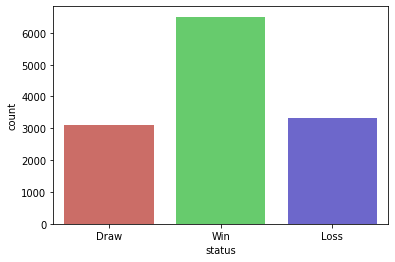

In [ ]:
# Checking the distribution of the target variable

sns.countplot(x='status',data=log_final, palette='hls')

In [ ]:
# encoding the status column with numeric codes

log_final['status'] = le.fit_transform(log_final['status'])

log_final.head()

,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,0,0,25,19,67,0
1,2,1,25,19,5,2
2,4,0,25,19,70,2
3,0,1,25,70,5,1
4,0,1,25,70,19,1


In [ ]:
# Declaring the features and target
x = log_final.drop("status",axis=1)
y = log_final["status"]

# creating the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

# fitting the model
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)

# Using our model to make a prediction
y_predicted = LogReg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# checking a sample of the predictions 
df_predicted = pd.DataFrame({'y_predicted': y_predicted, 'y_test': y_test})
df_predicted.sample(5)

,y_predicted,y_test
2252,2,2
7005,1,1
1249,2,2
10204,2,2
9164,0,0


In [ ]:
# Evaluating the model

confusion_matrix = confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

# Checking the model accuracy

accuracy = accuracy_score(y_test, y_predicted)
print('The accuracy of the model is', accuracy)

[[ 929    0    0]
 [   0 1000    0]
 [   0    0 1946]]
The accuracy of the model is 1.0


* we can clearly see the correct predictions(929,1000 & 1946) 

HYPERPARAMETER TUNING

In [ ]:
# Method 1: Grid Search

# Declaring the features and target
x = log_final.drop("status",axis=1)
y = log_final["status"]

# Creating the logistic regression
logistic = linear_model.LogisticRegression()

# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=3, verbose=0)

# Fitting grid search
best_model = clf.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

In [ ]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [ ]:
# Define features, target and train and test sets

X = log_final.iloc[:, 0:5].values
y = log_final.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scaling our Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

# Training and Cross Validation
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print(all_accuracies.mean())

0.9994838442944497


In [ ]:
# dictionary of all parameters and the values we want to test for best performance

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [ ]:
#Instantiating GridSearchCV object
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [ ]:
#Calling the fit method
gd_sr.fit(X_train, y_train)           

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
# Checking the parameters that return the highest accuracy

best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}


In [ ]:
# Finding the obtained accuracy

best_result = gd_sr.best_score_
print(best_result)

0.9994838442944497
